In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("tips.csv")

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#mean
np.mean(data['total_bill'])

19.785942622950824

In [6]:
#median
np.median(data['total_bill'])

17.795

In [7]:
#mode
import statistics
statistics.mode(data['total_bill'])

13.42

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

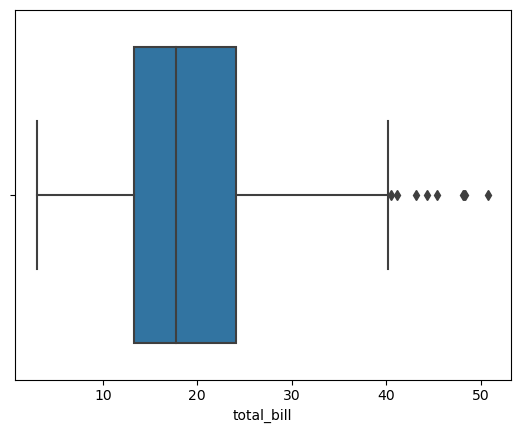

In [8]:
sns.boxplot(data['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

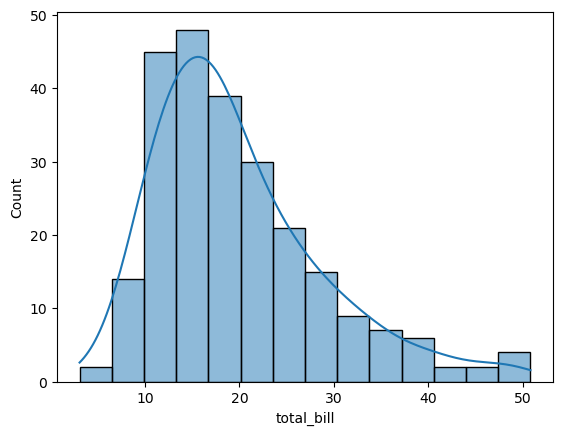

In [9]:
sns.histplot(data['total_bill'],kde=True)

In [10]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

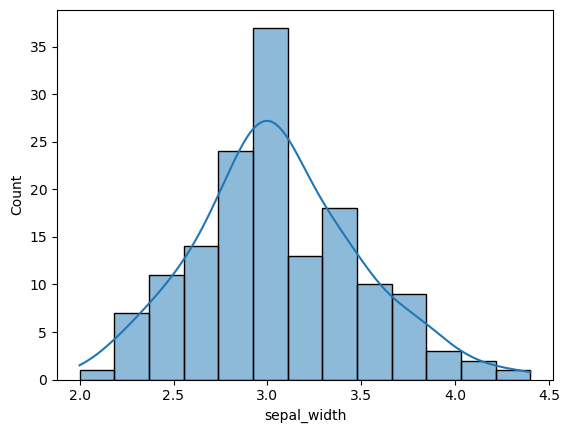

In [11]:
sns.histplot(df["sepal_width"],kde=True)

Gaussian distribution experienced in terms of sepal width as seen using the bell curve

In [12]:
np.mean(df['sepal_width'])

3.057333333333334

BARGRAPH===>

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

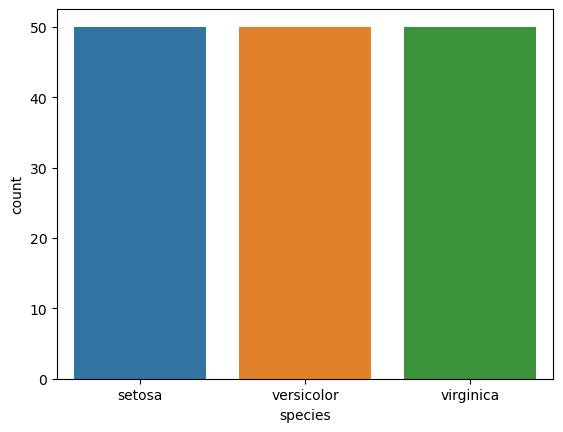

In [13]:
sns.countplot(df['species'])

Q1 and Q3 values

In [14]:
np.percentile(df['sepal_length'], [25,75])

array([5.1, 6.4])

## Z SCORE

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

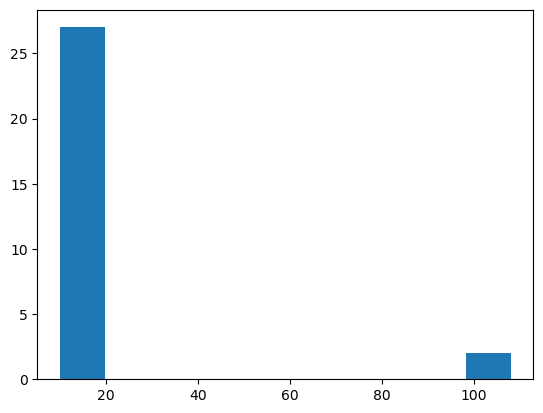

In [15]:
data1 = [11,10,12,14,12,15,14,13,15,12,14,17,19,107,10,13,12,108,12,11,14,13,15,12,10,14,12,15,10]
plt.hist(data1)

In [16]:
outliers =[]
def detect_outliers(data1):
    threshold = 3 ##defines 3 standard deviation
    mean = np.mean(data1)
    std = np.std(data1)

    for i in data1:
      z_score =(i-mean)/std
      if np.abs(z_score)>threshold:
         #if true then outlier
         outliers.append(i)

    return outliers


In [17]:
detect_outliers(data1)

[107, 108]

##IQR

In [18]:
#lower fence and higher fence
# 1)sort
# 2)calculate:Q1  and Q3
# 3)(Q3-Q1)
#4)find lower fence:Q1-1.5iqr and
# 5) higher fence  = q1+1.5iqr

In [19]:
data1 =sorted(data1)
data1

[10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 107,
 108]

In [20]:
Q1,Q3 = np.percentile(data1,[25,75])

In [21]:
Q1,Q3

(12.0, 15.0)

In [22]:
iqr = Q3-Q1
iqr

3.0

In [23]:
lower_fence =Q1-1.5*(iqr)
higher_fence = Q3 + 1.5*(iqr)

In [24]:
lower_fence,higher_fence

(7.5, 19.5)

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

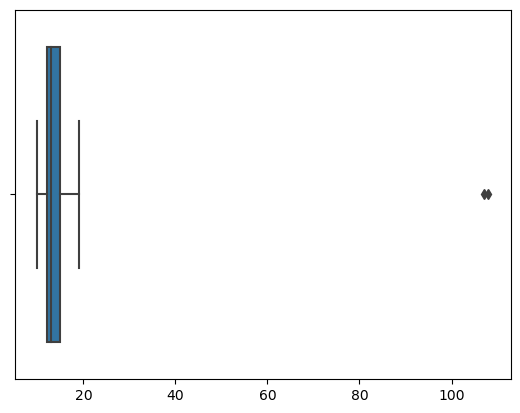

In [25]:
sns.boxplot(data1)

In [26]:
# remove outliers form data1
data1 = [x for x in data1 if x not in outliers]

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

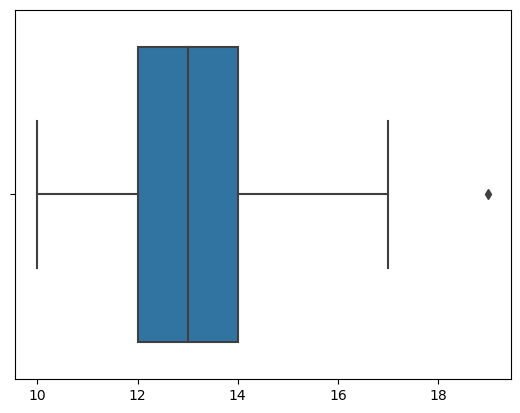

In [27]:
sns.boxplot(data1)

## Z test


For IQ based test


In [28]:
from statsmodels.stats.weightstats import ztest  as ztest

In [29]:
# enter iq levels
data =[88,92,94,94,96,97,97,99,99,105,109,109,109,110,112,113,114,115]

In [30]:
ztest(data,value=100)

(1.4192862138077156, 0.1558155897155245)

In [31]:
# value = 0.1558155897155245 used to compare with p value


## t Test

In [32]:
ages =[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,10,19,70]

In [34]:
mean_ages =np.mean(ages)
mean_ages

30.03125

In [36]:
# sample 
sample_size = 10
sample_ages = np.random.choice(ages,sample_size)

In [37]:
sample_ages

array([20, 16, 26, 40, 50, 28, 18, 14, 20, 23])

In [38]:
from scipy.stats import ttest_1samp


In [39]:
# compare with respect to the mean 
ttest_1samp(sample_ages,mean_ages)

Ttest_1sampResult(statistic=-1.2607901228479574, pvalue=0.23908720957461876)

p value is greater than the significance value so..
if ,alpha =0.05
p value =pvalue=0.24
